### Code start here

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def distance(idxmap, vector):
    return np.linalg.norm((idxmap-vector), axis=2)


class ksom:
    def __init__(self, x, y, depth, sigma_0, alpha_0, epochs):
        self.x = x
        self.y = y
        self.depth = depth
        self.map = np.random.rand(x, y, depth)
        self.indxmap = np.stack(np.unravel_index(np.arange(x * y, dtype=int).reshape(x, y), (x, y)), 2)
        self.sigma_0 = sigma_0
        self.epochs = epochs
        self.alpha_0 = alpha_0

    def winning(self, v):
        indx = np.argmin(np.sum((self.map - v) ** 2, axis=2))
        return np.array([[indx // self.x, indx % self.y]])

    def single_epoch(self, v, epoch_num):
        winner_indx = self.winning(v)
        dists = distance(self.indxmap, winner_indx)
        alpha = self.alpha_0*np.exp(-epoch_num/self.epochs)
        sigma = self.sigma_0*np.exp(-epoch_num/self.epochs)
        h = np.exp(-((dists**2)/(2*(sigma**2)))).reshape(self.x, self.y, 1)
        self.map -= h * alpha * (self.map - v)

    def train(self, datasets):
        n = len(datasets)
        for i in range(self.epochs):
            if i == 0:
                plt.imshow(self.map)
                plt.title('initial weights, sigma=%i' % self.sigma_0)
                plt.show()
            idx = np.random.permutation(n)
            datasets = datasets[idx]
            for j in range(n):
                self.single_epoch(datasets[j], i)
            if i in [19, 39, 99, 999]:
                plt.title('After %i epochs, sigma=%i' % (i+1, self.sigma_0))
                plt.imshow(self.map)
                plt.show()




### Prepare data

In [2]:
datasets = [[0, 0, 0], [255, 255, 255], [255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0], [0, 255, 255], [255, 0, 255],
                [255, 128, 128], [128, 255, 255], [128, 128, 255], [128, 255, 255], [255, 128, 255], [255, 255, 128], [0, 128, 255], [255, 0, 128], [128, 255, 0],
                [128, 128, 128], [128, 0, 0], [128, 128, 0], [0, 128, 0], [128, 0, 128], [0, 128, 128], [0, 0, 128]]
datasets = np.array(datasets) / 255

### Q4(a)

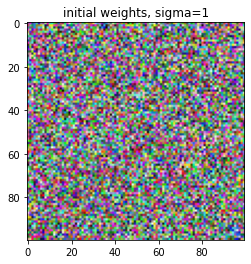

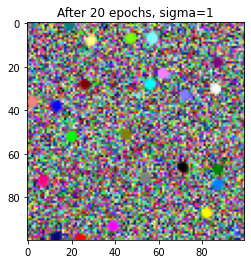

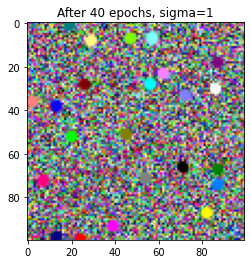

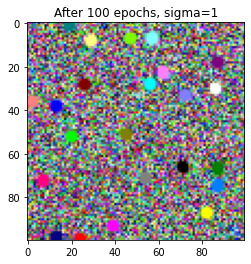

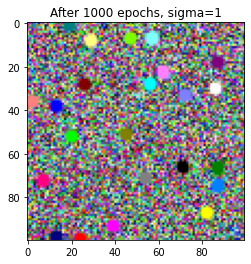

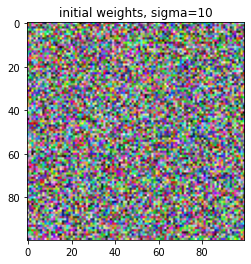

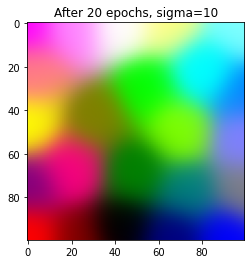

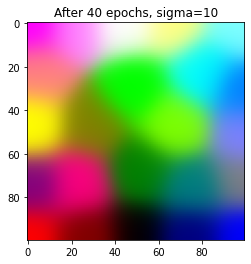

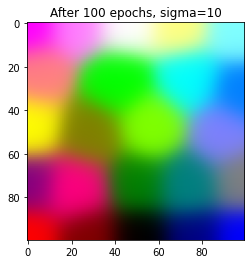

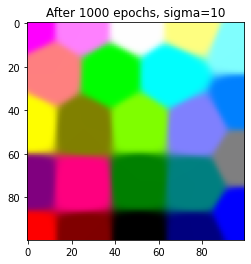

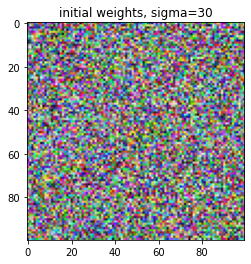

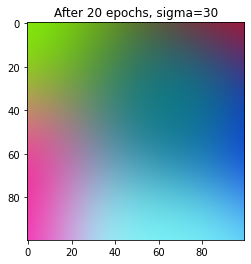

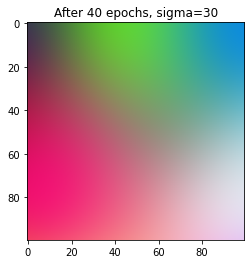

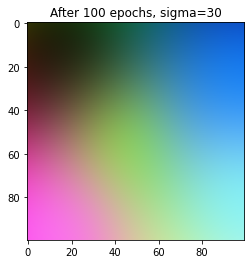

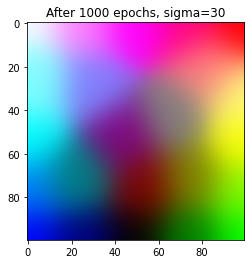

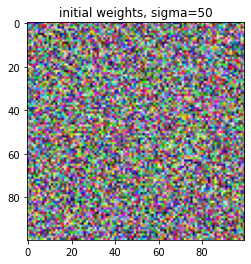

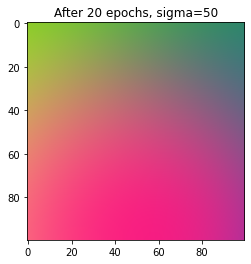

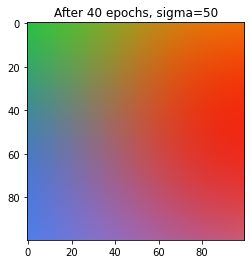

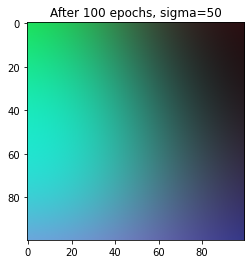

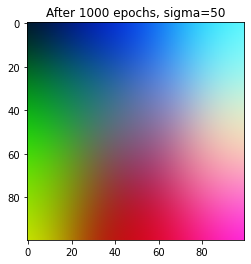

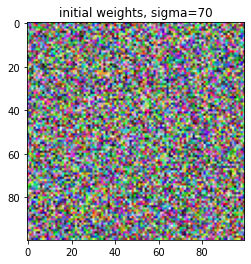

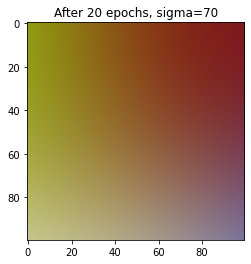

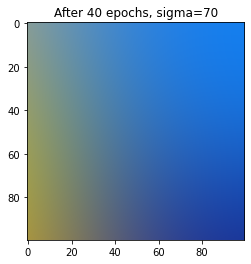

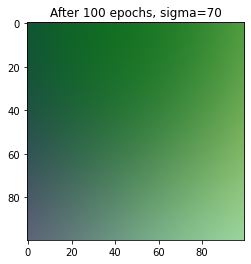

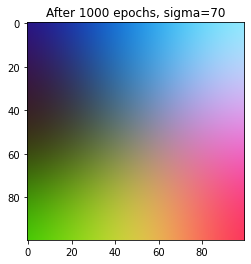

In [3]:
for sigma in [1, 10, 30, 50, 70]:
    nn = ksom(x=100, y=100, depth=3, sigma_0=sigma, alpha_0=0.8, epochs=1000)
    nn.train(datasets)

### Q4(b)

#### Smaller the sigma, the boundary between different kinds of colors is more clear.